In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score



To do this task I used documentation of scikit - learn mostly:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

# Solution for task 1 (Lasso) of lab assignment - FDA SS23 by [Bartosz Krajewski]




# Task 1.1 Is it possible to solve the lasso optimisation problem analytically? Explain. (3 points)

Yes it is possible. To do that  coordinate descent algorithm  should be used. The algorithm  updates one coordinate of coefficient vector at the time while the rest is fixed. The coordinates are updated by solving equations in the picture below:<br>
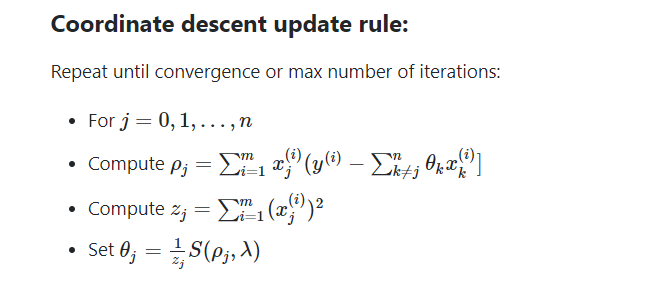<br>
Following abowe equations we can update weights. <br>
Source:
https://stats.stackexchange.com/questions/123672/coordinate-descent-soft-thresholding-update-operator-for-lasso?noredirect=1&lq=1

In [3]:
#  load data (change path if necessary)
df = pd.read_csv("lasso_data.csv")

In [4]:
columns = ['X1','X2','X3','X4','X5','X6']
label =['y']

In [5]:
X = df[columns]
y = df[label]
y
scores = pd.DataFrame()

# Task 1.2 Split the data into a train and a test set with appropriate test size. (2 points)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print(X_train.shape); print(X_test.shape)



(24000, 6)
(6000, 6)


# Task 1.3 Fit a linear regression model for Y using all remaining variables on the training data. (5 points)


In [7]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X, y))
print(reg.coef_)

0.9920848562751585
[[ 3.00758594e+00  1.00196108e+00 -3.03883050e-04  1.00196108e+00
  -2.00206643e+00 -1.04267519e-03]]



# Task 1.4 Make a model prediction on unseen data and assess model performance using a suitable metric. (5 points)

In [8]:

y_training_pred = reg.predict(X_train)
print(y_training_pred)
mse_training = mean_squared_error(y_train, y_training_pred)
r2_training = r2_score(y_train, y_training_pred)

print("Mean squared error: {:.2f}".format(mse_training))
print("R^2 score: {:.2f}".format(r2_training))


y_test_pred = reg.predict(X_test)
print(y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean squared error: {:.2f}".format(mse_test))
print("R^2 score: {:.2f}".format(r2_test))
scores['linear_model'] = [mse_test, r2_test]


[[-18.05989669]
 [ -0.12886708]
 [ -5.98064666]
 ...
 [ 12.09428139]
 [  0.05903533]
 [  8.3511596 ]]
Mean squared error: 0.99
R^2 score: 0.99
[[-4.5746394 ]
 [ 4.96620411]
 [-3.72523477]
 ...
 [-3.24947989]
 [-7.02456222]
 [ 3.71069855]]
Mean squared error: 1.03
R^2 score: 0.99


# Task 1.5 Perform lasso regression using the same data as in task 1.3 (6 points)
<br> I used cross validation to find parameters:

In [9]:
# https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d #
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2']
    return cv_accuracies, maes, mses, r2s

In [10]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg1 = Lasso(alpha=0.01)
lasso_reg2 = Lasso(alpha=0.1)
lasso_reg3 = Lasso(alpha=0.2)
models = [lasso_reg, lasso_reg1, lasso_reg2, lasso_reg3]


comp, maes, mses, r2s = cv_comparison(models, X_train, y_train, 4)
comp

,Lasso(alpha=0.001),Lasso(alpha=0.01),Lasso(alpha=0.1),Lasso(alpha=0.2)
Mean Absolute Error,0.7930,0.7930,0.7978,0.8126
Mean Squared Error,0.9892,0.9893,1.0021,1.0408
R^2,0.9922,0.9922,0.9921,0.9918


I have chosen alpha = 0.01, because mean squared error is low enough and R^2 value is close to 1

In [36]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train) 
pred_train_lasso= lasso_reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

1.000905524525255
0.9920901661528703
1.0206167913565658
0.9915086922459957


# Task 1.6 Compare model performance to the original linear model by using the same metric and test set as in 1.4.
# What do you observe? (2 points)

In [37]:

y_lasso_test_pred = lasso_reg.predict(X_test)
print(y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean squared error: {:.2f}".format(mse_test))
print("R^2 score: {:.2f}".format(r2_test))
scores['lasso_model'] = [mse_test, r2_test]
scores.index = ['Mean Squared Error', 'R^2']

scores

[[-4.5746394 ]
 [ 4.96620411]
 [-3.72523477]
 ...
 [-3.24947989]
 [-7.02456222]
 [ 3.71069855]]
Mean squared error: 1.03
R^2 score: 0.99


,linear_model,lasso_model
Mean Squared Error,1.025501,1.025501
R^2,0.991640,0.991640


The performance is nearly the same

In [38]:
coef = pd.DataFrame()
coef['linear_model'] = reg.coef_[0]
print(reg.coef_[0])
print(lasso_reg.coef_)
coef['lasso_model'] = lasso_reg.coef_
coef.index = ['X1', 'X2' , 'X3', 'X4','X5' , 'X6']
coef


[ 3.00758594e+00  1.00196108e+00 -3.03883050e-04  1.00196108e+00
 -2.00206643e+00 -1.04267519e-03]
[ 2.90753193e+00  1.97872572e+00 -5.66899876e-05  1.24289829e-06
 -1.99810548e+00 -0.00000000e+00]


,linear_model,lasso_model
X1,3.007586,2.907532
X2,1.001961,1.978726
X3,-0.000304,-0.000057
X4,1.001961,0.000001
X5,-2.002066,-1.998105
X6,-0.001043,-0.000000


# Task 1.8 What do you observe comparing the estimated model coefficients? Was this result expected? (5 points)
# Hint: Look at the data generating process and lasso explanation to answer this question

Y = 3 * X1 + X2 + X4 - 2*X5 + E \
Linear model covers those coefficients nearly perfect.\
Lasso model coefficients are nearly the same as linears although there is a difference in X2 value and X4 value.\
Lasso' s X2 is two times bigger than  linear's X2 and lasso's X4 equals nearly 0, while linear approximatelly equals 1.\
The important thing is that   in data generation process  X2 = X4.<br> So the end score is actually  the same for both regressions, because X4 nulled itself while X2 covered the difference (X2 = X2 + X4 ).\
As written in assigment theory:<br> "Lasso introduces a regularisation term to the optimisation problem that penalises the size of the model parameters
and hence may set them (closer) to zero." so the final result is consistent with the theory, because it led to sparser model.

